# Homework 4: Distributions from Distributions

***
### Academic honesty statement

**SANTIAGO ORTIZ LAVERDE**

- I state that I worked alone on this assignment. Therefore, I take full responsibility for the academic integrity of the work presented below.
***

# Short explanation of a t test
- t test tests the likelihood of obtaining a value of t from a normal population
- t is a weighted mean in a sense. More specifically, t is the difference between two means divided by (weighted by) a standard deviation.
- There is more than 1 way to perform a t test. We will start with a single sample t test and move on to other types of t tests later.

# "Single sample" t test
- One, it should be noted that researchers working at Guinness Brewer are often credited with creating the t test while studying barley...
- $t = \frac{\bar{X}-\mu}{\bar{\sigma}}\sqrt{n}$ where
    - $\bar{X}$ is the sample mean
    - $\mu$ is a hypothesized mean
    - n is the # of measurements collected 
    - $\bar{\sigma}$ is the sample standard deviation
- And it is assumed that all data measured comes from a normal distribution.

***
## Problem 1 - Estimate p value using a brute-force sampled distributions of t.

*This is identifcally what we did in class.*

### 1.1 First task
- Generate a normally distributed population: Let's start by ensuring we understand how to sample normally distributed data. Using Random.rand and Distributions.Normal from Julia, randomly sample 10,000 values from a normal distribution whose mean is 12 and standard deviation is 2. Save the values in a variable called norm_data. Plot a histogram of the collected values and then plot a density plot of the collected values. 

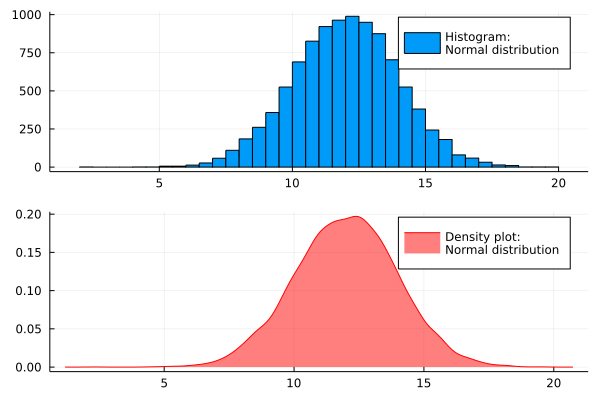

In [6]:
using Random, Distributions
using StatsPlots
using Plots

#Random.seed!(123)
μ = 12
σ = 2
N = 10000
norm_data = rand(Normal(μ, σ), N)

hist1 = histogram(norm_data, label="Histogram:\nNormal distribution")
denst1 = density(norm_data, color=:red, fill=(0, .5, :red), label="Density plot:\nNormal distribution")
plot(hist1, denst1, layout=(2, 1))

### 1.2 Second task

- Use your normally distributed population to generate a "null distribution" of t values for **when n = 3.** The idea of a null hypothesis can be tricky without some practice. To generate a null hypothesis for any statistic requires choosing representative values, in this case for the population mean $\mu$. Ultimatelty, we are asking "if I know the what my population is, then how much variation is expected in the value of t when I collect data from my defined population?" 

    To do this, write a for-loop in which you collect 3 samples from your normal distribution data (norm_data) above and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values.

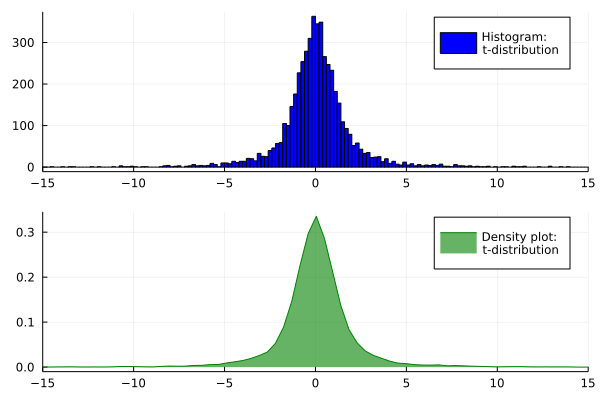

In [7]:
using Statistics

rand_collection(data, s) = rand(data, (1, s));

function t_value(collct, μ)
    n = length(collct)
    X = mean(collct)
    S = std(collct, corrected=true, mean=X)
    return sqrt(n)*(X - μ)/S
end

function t_distribution(data, s, L)
    μ = mean(data)
    dist = [t_value(rand_collection(data, s), μ) for j in range(1, L)]
    return dist
end

t_dist = t_distribution(norm_data, 3, 5000)
hist2 = histogram(t_dist, color=:blue, label="Histogram:\nt-distribution", bins=500)
denst2 = density(t_dist, color=:green, fill=(0, .6, :green), label="Density plot:\nt-distribution")
plot(hist2, denst2, layout=(2, 1), xlim=(-15, 15))

### 1.3 Third task

- Check that distribution works correctly: Let's ensure that we can use our distribution to estimate a p value. You take 3 random measurements and get these numbers: 9.45, 10.3, and 11. Calculate and print your t value (call it t_val) and use your t distribution to estimate the odds of obtaining a t that is less than or equal to t_val. 

In [8]:
sample = [9.45, 10.3, 11]
t_val = t_value(sample, μ)
p_value = sum(t_dist .<= t_val)/length(t_dist)

printstyled("t_value obtained is $(t_val) \n"; color=:blue)
printstyled("p_value obtained from the t-distribution is $(p_value)"; color=:blue)

t_value obtained is -3.9049920173544073 
p_value obtained from the t-distribution is 0.0312